In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

file_path=r"C:\Users\ADMIN\Downloads\San Francisco Employee Salary.xlsx"

df=pd.read_excel(file_path)
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011


In [39]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309320 entries, 0 to 309319
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      309320 non-null  object 
 1   JobTitle          309320 non-null  object 
 2   BasePay           309003 non-null  float64
 3   OvertimePay       309320 non-null  float64
 4   OtherPay          309320 non-null  float64
 5   Benefits          309320 non-null  float64
 6   TotalPay          309320 non-null  float64
 7   TotalPayBenefits  309320 non-null  float64
 8   Year              309320 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.2+ MB


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,309003.000000,309320.000000,309320.000000,309320.000000,309320.000000,309320.000000,309320.000000
mean,70543.648917,5732.142744,3464.061413,22350.603411,79667.557920,102018.161332,2014.624075
std,45042.205115,12803.989675,7348.098688,16238.992435,52901.885356,66066.559850,2.289899
min,0.100000,0.000000,0.000000,0.000000,0.110000,0.110000,2011.000000
25%,37838.420000,0.000000,0.000000,2461.057500,41209.725000,51826.860000,2013.000000
50%,68115.460000,0.000000,734.260000,26931.890000,75569.095000,100860.800000,2015.000000
75%,99951.000000,5341.447500,3974.202500,34385.090000,112020.622500,143059.602500,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


In [33]:
cols = ['BasePay','OvertimePay','OtherPay','Benefits']
for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [34]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312276.000000,312881.000000,312881.000000,276722.000000,312882.000000,312882.000000,312882.000000
mean,69808.257496,5668.929393,3460.694974,25016.917292,78802.645788,100928.339777,2014.625303
std,45376.929428,12745.655309,7387.263120,15089.077103,53230.758542,66485.186495,2.290899
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2011.000000
25%,35722.365000,0.000000,0.000000,12729.762500,38803.000000,48955.072500,2013.000000
50%,67710.450000,0.000000,728.000000,28327.330000,74908.790000,100011.290000,2015.000000
75%,99312.302500,5223.120000,3958.680000,35268.162500,111386.897500,142376.300000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


In [35]:
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               606
OvertimePay             1
OtherPay                1
Benefits            36160
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

In [29]:
df = df[
    (df['BasePay'] > 0) &
    (df['OvertimePay'] >= 0) &
    (df['OtherPay'] >= 0) &
    (df['Benefits'] >= 0)
]

df = df[(df['TotalPay'] > 0) & (df['TotalPayBenefits'] > 0)]

df['Benefits'] = df['Benefits'].fillna(0)
df['Benefits'].isnull().sum()
df['Benefits'].head()

36159    44430.12
36160    69810.19
36161    53102.29
36162    72047.88
36163    44438.25
Name: Benefits, dtype: float64

In [40]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,309003.000000,309320.000000,309320.000000,309320.000000,309320.000000,309320.000000,309320.000000
mean,70543.648917,5732.142744,3464.061413,22350.603411,79667.557920,102018.161332,2014.624075
std,45042.205115,12803.989675,7348.098688,16238.992435,52901.885356,66066.559850,2.289899
min,0.100000,0.000000,0.000000,0.000000,0.110000,0.110000,2011.000000
25%,37838.420000,0.000000,0.000000,2461.057500,41209.725000,51826.860000,2013.000000
50%,68115.460000,0.000000,734.260000,26931.890000,75569.095000,100860.800000,2015.000000
75%,99951.000000,5341.447500,3974.202500,34385.090000,112020.622500,143059.602500,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


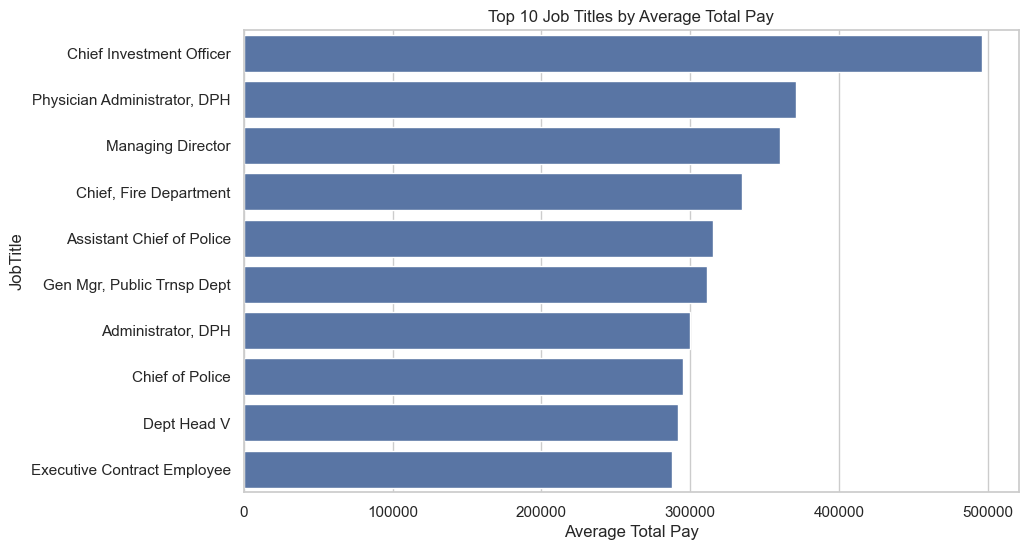

In [9]:
top_jobs = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title("Top 10 Job Titles by Average Total Pay")
plt.xlabel("Average Total Pay")
plt.show()

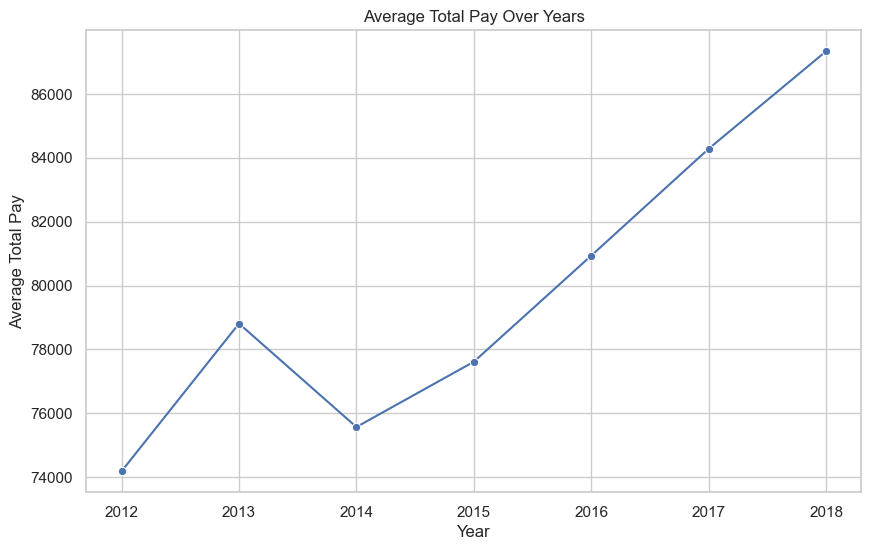

In [11]:
avg_pay_year = df.groupby('Year')['TotalPay'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=avg_pay_year.index, y=avg_pay_year.values, marker='o')
plt.title("Average Total Pay Over Years")
plt.xlabel("Year")
plt.ylabel("Average Total Pay")
plt.show()

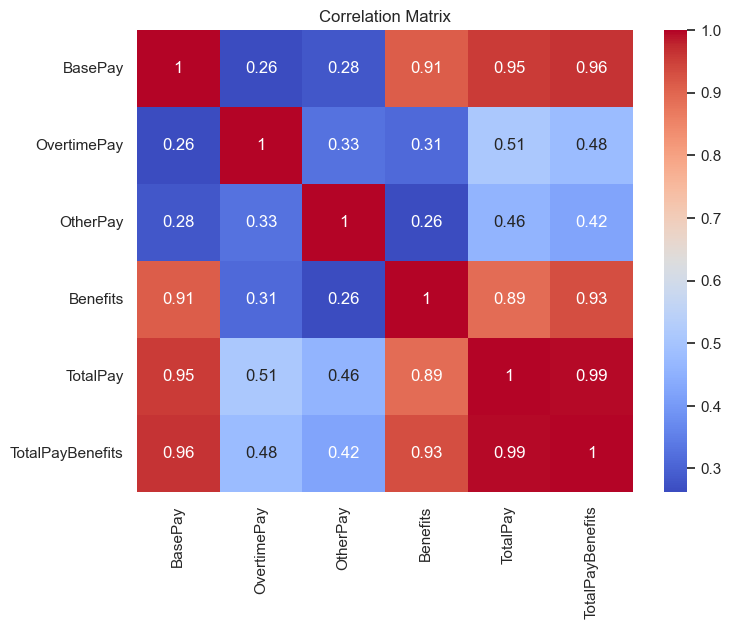

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [13]:
df['JobTitle'].value_counts().head(10)

JobTitle
Transit Operator                17910
Special Nurse                   10834
Registered Nurse                 9233
Firefighter                      5868
Custodian                        5735
Police Officer 3                 5417
Public Service Trainee           4921
Public Svc Aide-Public Works     4796
Recreation Leader                4777
Police Officer                   4244
Name: count, dtype: int64

In [15]:
df.groupby('Year')['JobTitle'].nunique()

Year
2012    1044
2013    1041
2014     995
2015    1010
2016    1006
2017    1016
2018     998
Name: JobTitle, dtype: int64

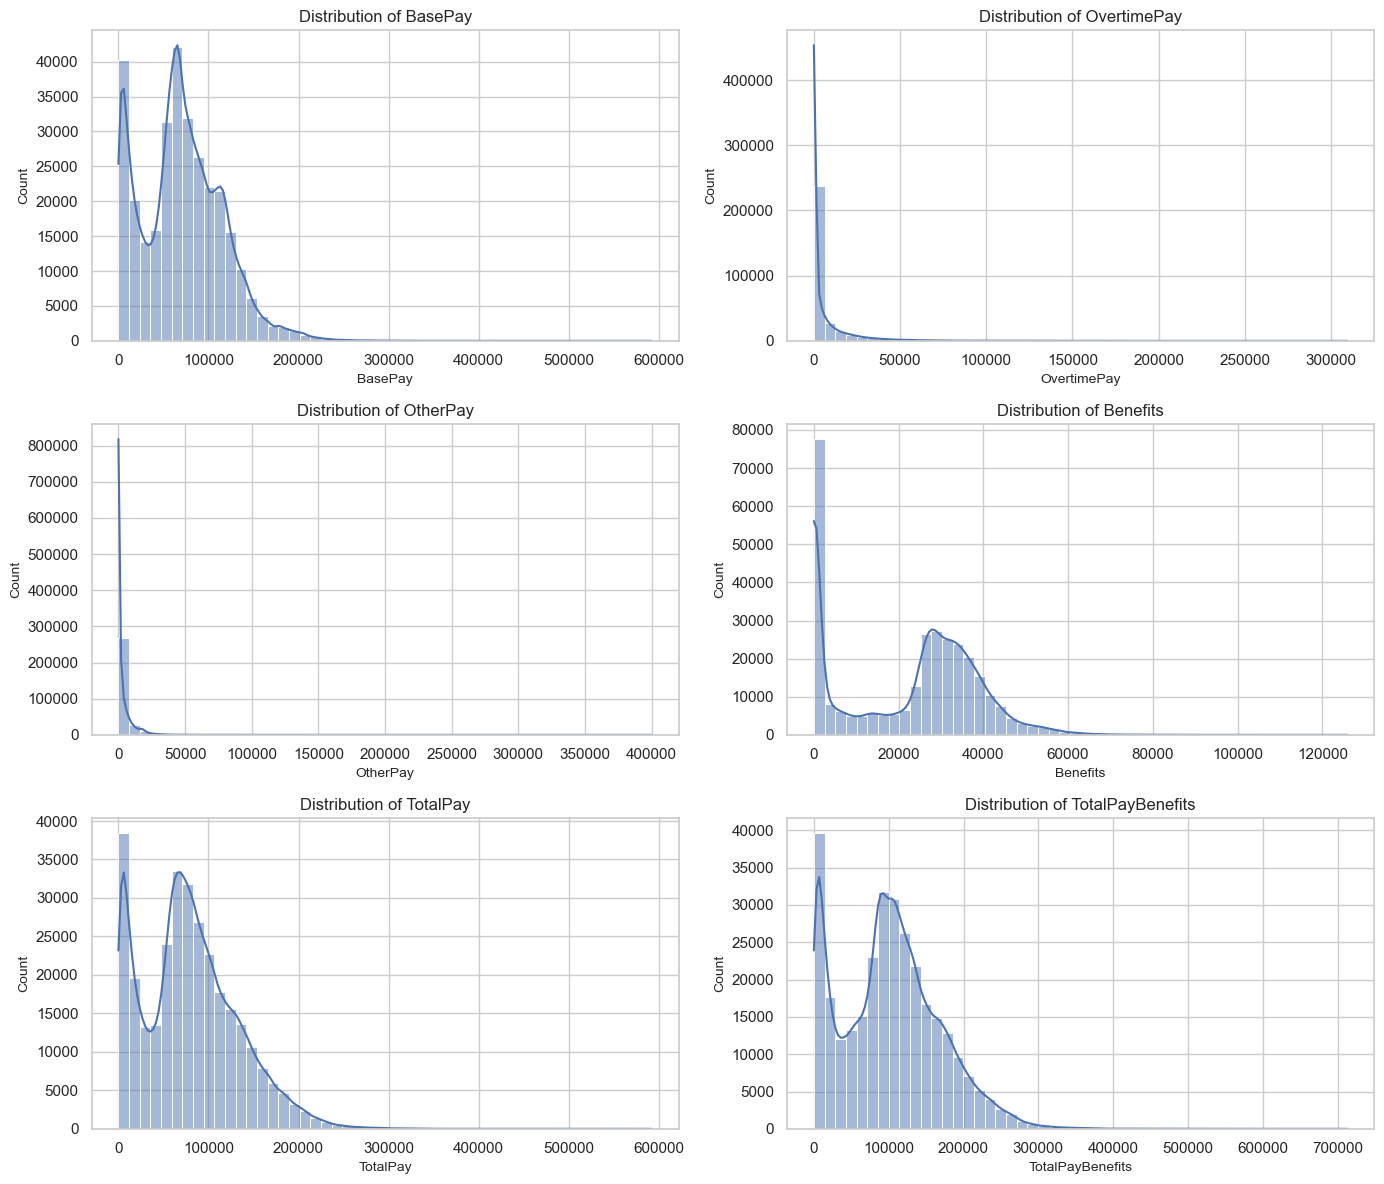

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# List of columns
cols = [
    'BasePay', 
    'OvertimePay', 
    'OtherPay', 
    'Benefits',
    'TotalPay', 
    'TotalPayBenefits'
]

# Create subplots (3 rows, 2 columns)
plt.figure(figsize=(14, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3536\3145388373.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=job_pay_total.values, y=job_pay_total.index, palette="Blues_r")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3536\3145388373.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=job_pay_base.values, y=job_pay_base.index, palette="Greens_r")


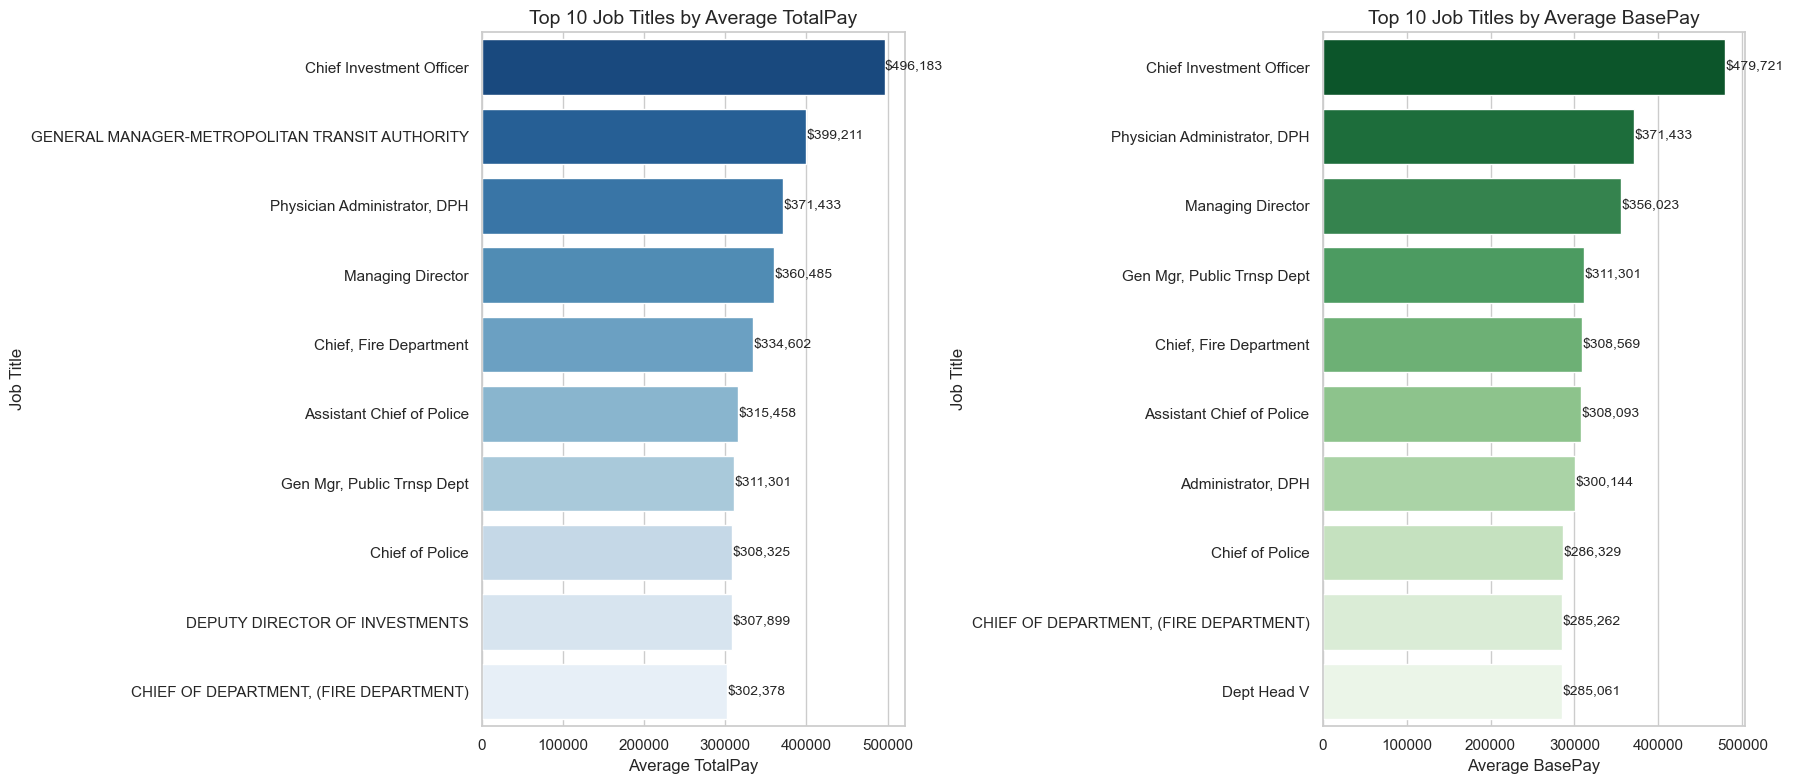

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Top 10 by TotalPay
job_pay_total = (
    df.groupby('JobTitle')['TotalPay']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

# Top 10 by BasePay
job_pay_base = (
    df.groupby('JobTitle')['BasePay']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

# Create subplots side by side
plt.figure(figsize=(18, 8))

# --- Plot 1: TotalPay ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=job_pay_total.values, y=job_pay_total.index, palette="Blues_r")
plt.title('Top 10 Job Titles by Average TotalPay', fontsize=14)
plt.xlabel('Average TotalPay', fontsize=12)
plt.ylabel('Job Title', fontsize=12)

# Add data labels
for i, v in enumerate(job_pay_total.values):
    plt.text(v + 500, i, f"${v:,.0f}", va='center', fontsize=10)

# --- Plot 2: BasePay ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=job_pay_base.values, y=job_pay_base.index, palette="Greens_r")
plt.title('Top 10 Job Titles by Average BasePay', fontsize=14)
plt.xlabel('Average BasePay', fontsize=12)
plt.ylabel('Job Title', fontsize=12)

# Add data labels
for i, v in enumerate(job_pay_base.values):
    plt.text(v + 500, i, f"${v:,.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3536\2771758269.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3536\2771758269.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


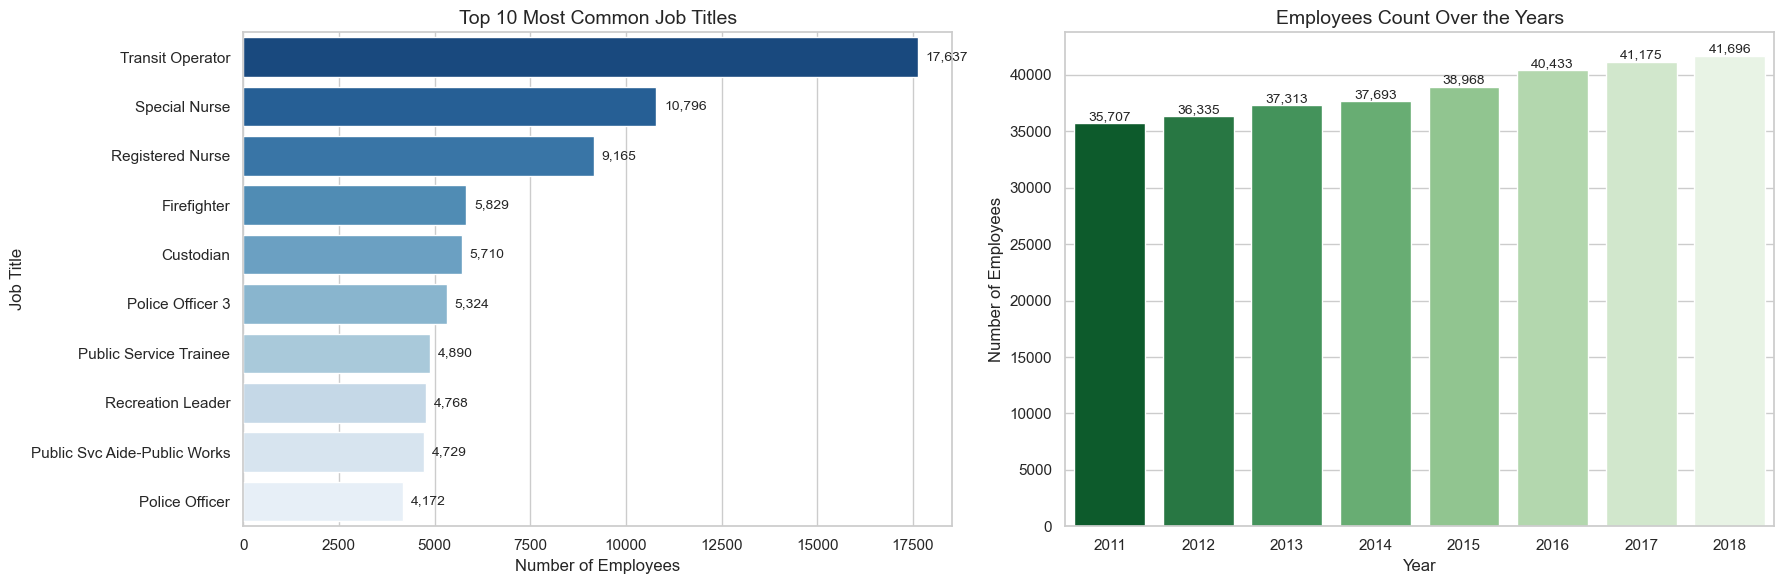

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Top 10 most common job titles
top_jobs = (
    df['JobTitle']
    .value_counts()
    .head(10)
    .index
)

# Employee count by year
employees_by_year = (
    df['Year']
    .value_counts()
    .sort_index()
)

# Create subplots side-by-side
plt.figure(figsize=(18, 6))

# --- Plot 1: Top 10 Job Titles ---
plt.subplot(1, 2, 1)
sns.countplot(
    data=df[df['JobTitle'].isin(top_jobs)],
    y='JobTitle',
    order=top_jobs,
    palette='Blues_r'
)
plt.title('Top 10 Most Common Job Titles', fontsize=14)
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('Job Title', fontsize=12)

# Add data labels
for i, v in enumerate(df[df['JobTitle'].isin(top_jobs)]['JobTitle'].value_counts().loc[top_jobs]):
    plt.text(v + 200, i, f"{v:,}", va='center', fontsize=10)


# --- Plot 2: Employee Count by Year ---
plt.subplot(1, 2, 2)
sns.barplot(
    x=employees_by_year.index,
    y=employees_by_year.values,
    palette='Greens_r'
)
plt.title('Employees Count Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

# Add data labels on bars
for i, v in enumerate(employees_by_year.values):
    plt.text(i, v + 300, f"{v:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


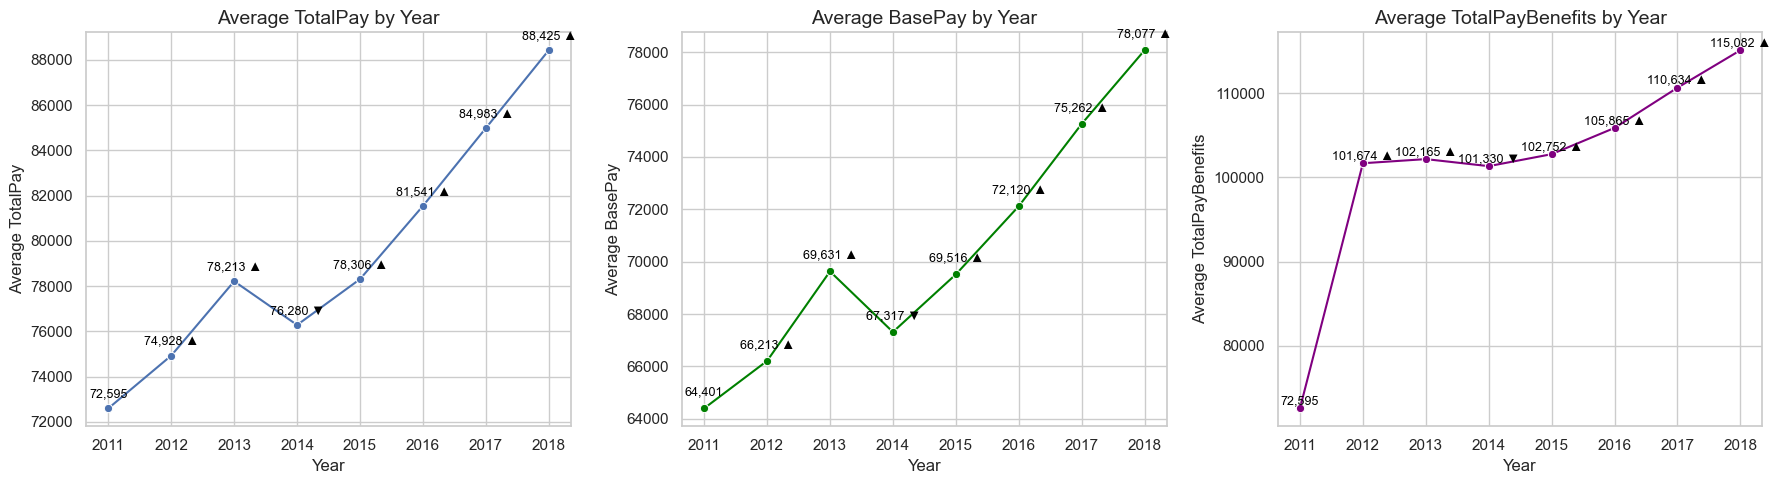

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# Prepare grouped data
pay_by_year = (
    df.groupby('Year')[['TotalPay', 'BasePay', 'TotalPayBenefits']]
      .mean()
      .reset_index()
)

# Function to add labels with increase/decrease arrow
def add_labels_with_arrows(ax, x, y):
    for i in range(len(x)):
        value = y[i]
        
        if i == 0:
            label = f"{value:,.0f}"   # No arrow for first year
        else:
            diff = value - y[i-1]
            if diff > 0:
                label = f"{value:,.0f} ▲"
            elif diff < 0:
                label = f"{value:,.0f} ▼"
            else:
                label = f"{value:,.0f} •"  # no change
        
        ax.text(
            x[i], y[i] + 500, label,
            ha='center', fontsize=9, color='black'
        )

# Create 3 subplots
plt.figure(figsize=(18, 5))

# --- Plot 1: TotalPay ---
ax1 = plt.subplot(1, 3, 1)
sns.lineplot(data=pay_by_year, x='Year', y='TotalPay', marker='o', ax=ax1)
add_labels_with_arrows(ax1, pay_by_year['Year'], pay_by_year['TotalPay'])
ax1.set_title("Average TotalPay by Year", fontsize=14)
ax1.set_xlabel("Year")
ax1.set_ylabel("Average TotalPay")

# --- Plot 2: BasePay ---
ax2 = plt.subplot(1, 3, 2)
sns.lineplot(data=pay_by_year, x='Year', y='BasePay', marker='o', color='green', ax=ax2)
add_labels_with_arrows(ax2, pay_by_year['Year'], pay_by_year['BasePay'])
ax2.set_title("Average BasePay by Year", fontsize=14)
ax2.set_xlabel("Year")
ax2.set_ylabel("Average BasePay")

# --- Plot 3: TotalPayBenefits ---
ax3 = plt.subplot(1, 3, 3)
sns.lineplot(data=pay_by_year, x='Year', y='TotalPayBenefits', marker='o', color='purple', ax=ax3)
add_labels_with_arrows(ax3, pay_by_year['Year'], pay_by_year['TotalPayBenefits'])
ax3.set_title("Average TotalPayBenefits by Year", fontsize=14)
ax3.set_xlabel("Year")
ax3.set_ylabel("Average TotalPayBenefits")

plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3536\3302105314.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


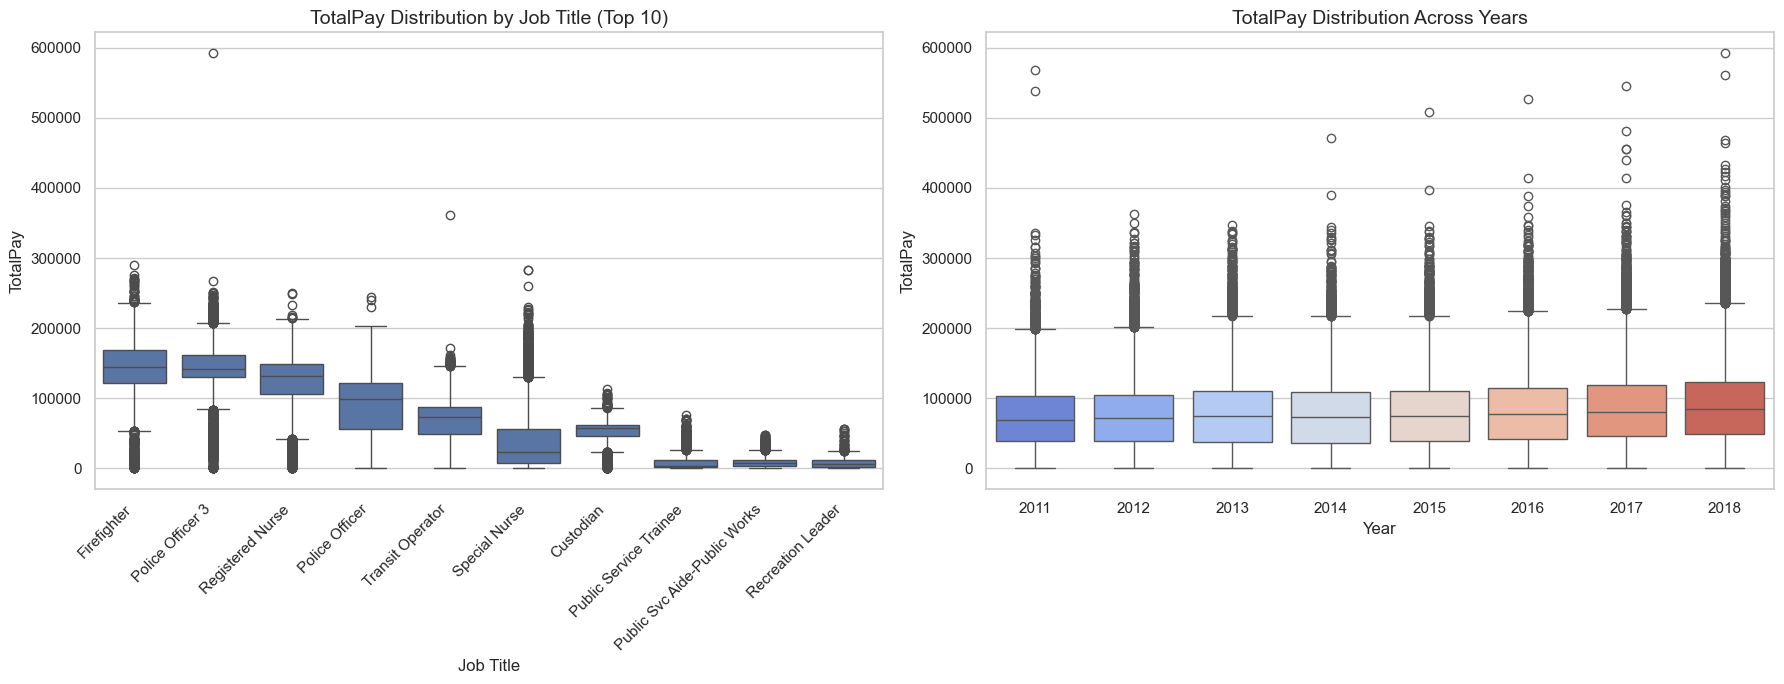

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Top 10 job titles
top_jobs = (
    df['JobTitle']
    .value_counts()
    .head(10)
    .index
)

# Create 2 subplots
plt.figure(figsize=(18, 7))

# --- Plot 1: TotalPay by Top Job Titles ---
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df[df['JobTitle'].isin(top_jobs)],
    x='JobTitle',
    y='TotalPay',
    showfliers=True
)
plt.title('TotalPay Distribution by Job Title (Top 10)', fontsize=14)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('TotalPay', fontsize=12)
plt.xticks(rotation=45, ha='right')

# --- Plot 2: TotalPay Across Years ---
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df,
    x='Year',
    y='TotalPay',
    showfliers=True,
    palette='coolwarm'
)
plt.title('TotalPay Distribution Across Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('TotalPay', fontsize=12)

plt.tight_layout()
plt.show()

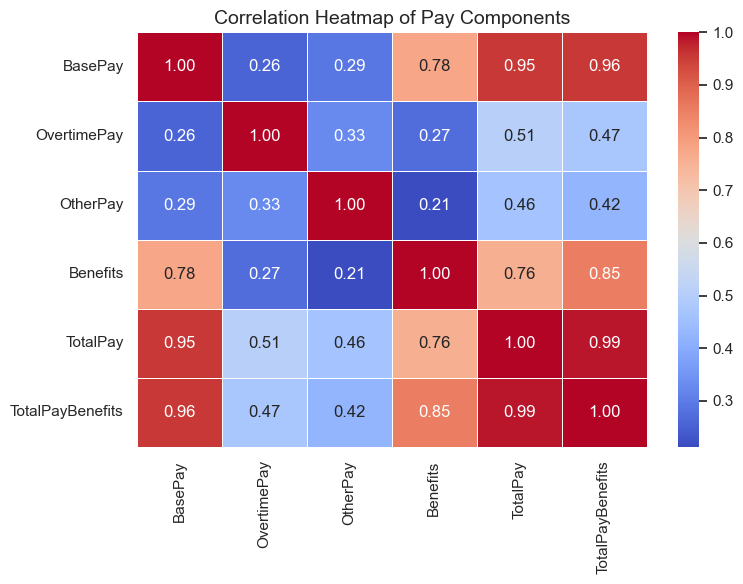

In [10]:
plt.figure(figsize=(8,6))

corr_cols = ['BasePay', 'OvertimePay', 'OtherPay',
             'Benefits', 'TotalPay', 'TotalPayBenefits']
corr = df[corr_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Pay Components', fontsize=14)
plt.tight_layout()
plt.show()

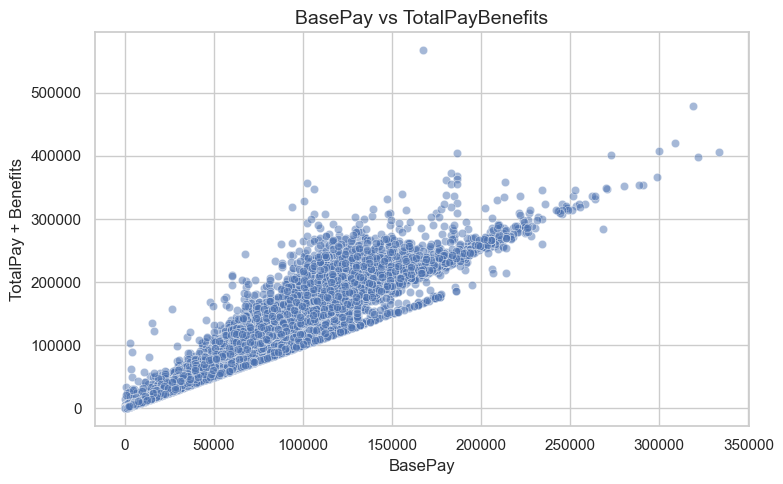

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df.sample(min(20000, len(df)), random_state=42),  # sample to avoid overplotting
    x='BasePay',
    y='TotalPayBenefits',
    alpha=0.5
)
plt.title('BasePay vs TotalPayBenefits', fontsize=14)
plt.xlabel('BasePay', fontsize=12)
plt.ylabel('TotalPay + Benefits', fontsize=12)
plt.tight_layout()
plt.show()

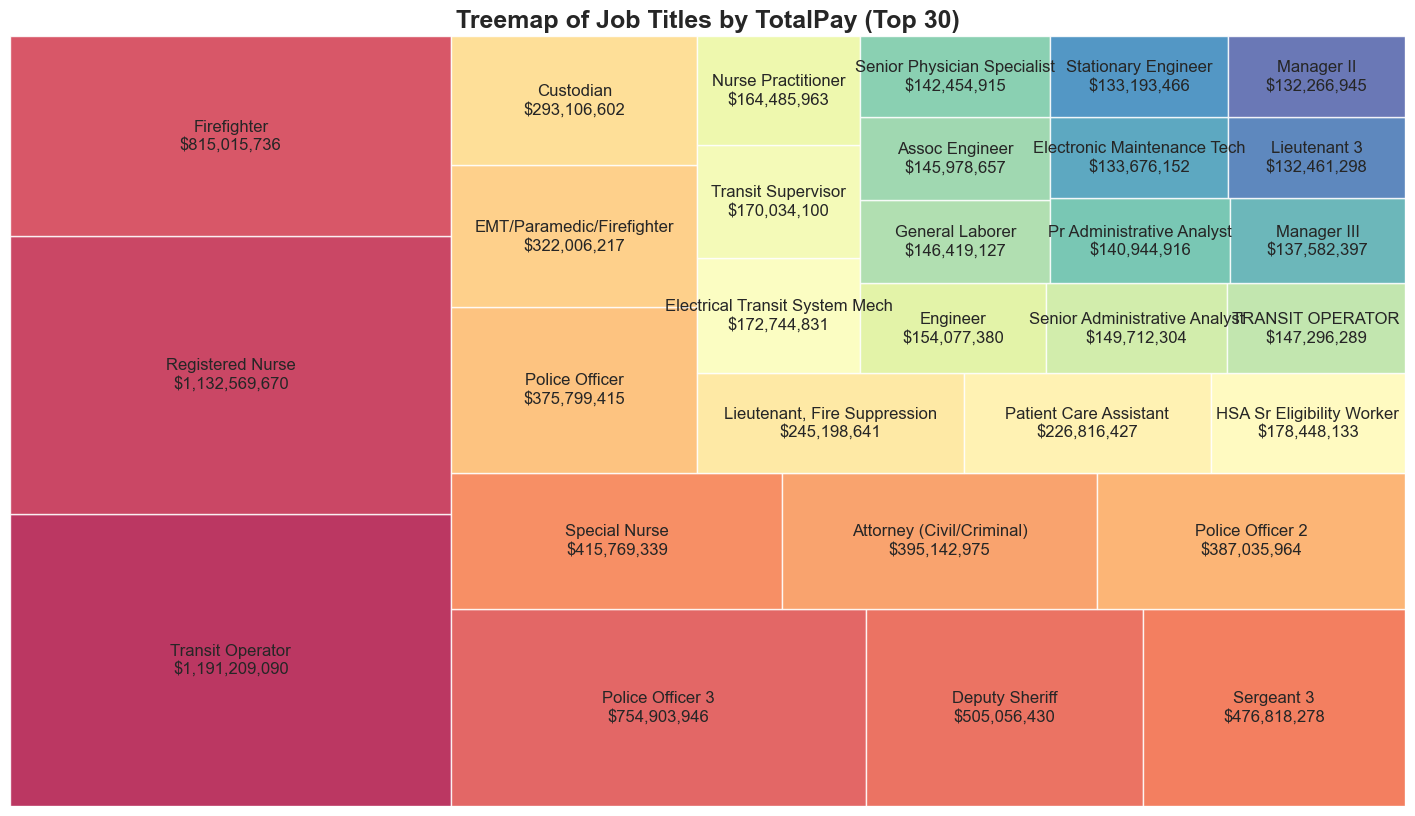

In [24]:
# First, install the squarify package
!pip install squarify

# Then import the required libraries
import matplotlib.pyplot as plt
import squarify  # This will now be available after installation
import seaborn as sns

sns.set(style="whitegrid")

# Aggregate TotalPay by JobTitle
job_pay_sum = (
    df.groupby('JobTitle')['TotalPay']
      .sum()
      .sort_values(ascending=False)
      .head(30)   # show top 30 job titles for readability
)

# Treemap
plt.figure(figsize=(18, 10))
squarify.plot(
    sizes=job_pay_sum.values,
    label=[f"{x}\n${y:,.0f}" for x, y in zip(job_pay_sum.index, job_pay_sum.values)],
    color=sns.color_palette("Spectral", len(job_pay_sum)),
    alpha=0.85
)

plt.title("Treemap of Job Titles by TotalPay (Top 30)", fontsize=18, weight="bold")
plt.axis("off")
plt.show()

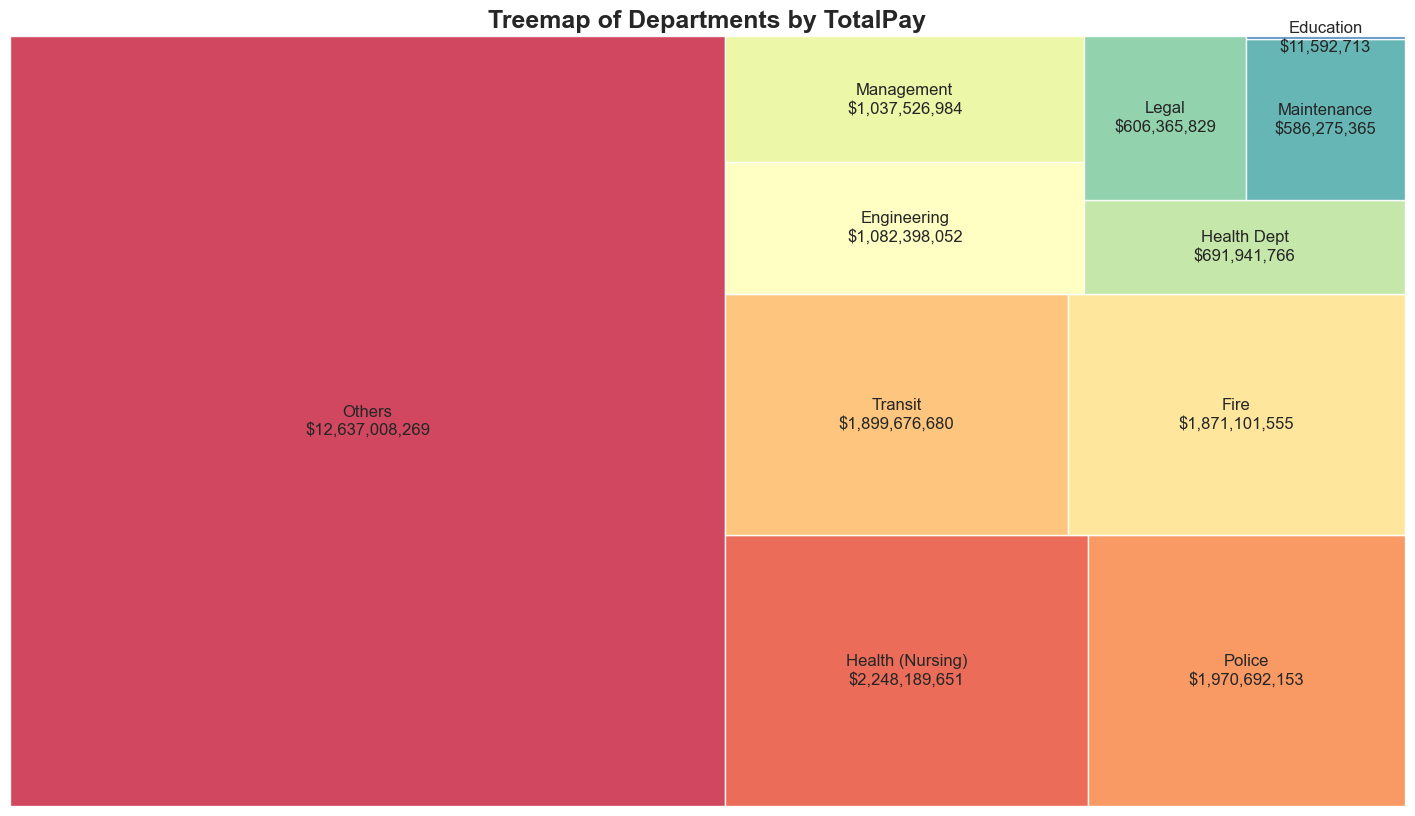

In [25]:
def extract_department(title):
    title = title.lower()
    if "police" in title:
        return "Police"
    elif "fire" in title:
        return "Fire"
    elif "transit" in title:
        return "Transit"
    elif "nurse" in title:
        return "Health (Nursing)"
    elif "health" in title or "medical" in title:
        return "Health Dept"
    elif "engineer" in title:
        return "Engineering"
    elif "maintenance" in title or "custodian" in title:
        return "Maintenance"
    elif "manager" in title:
        return "Management"
    elif "teacher" in title or "school" in title:
        return "Education"
    elif "attorney" in title or "legal" in title:
        return "Legal"
    else:
        return "Others"

df["Department"] = df["JobTitle"].apply(extract_department)
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

sns.set(style="whitegrid")

# Aggregate TotalPay by Department
dept_pay = df.groupby("Department")["TotalPay"].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 10))
squarify.plot(
    sizes=dept_pay.values,
    label=[f"{x}\n${y:,.0f}" for x, y in zip(dept_pay.index, dept_pay.values)],
    color=sns.color_palette("Spectral", len(dept_pay)),
    alpha=0.9
)

plt.title("Treemap of Departments by TotalPay", fontsize=18, weight="bold")
plt.axis("off")
plt.show()

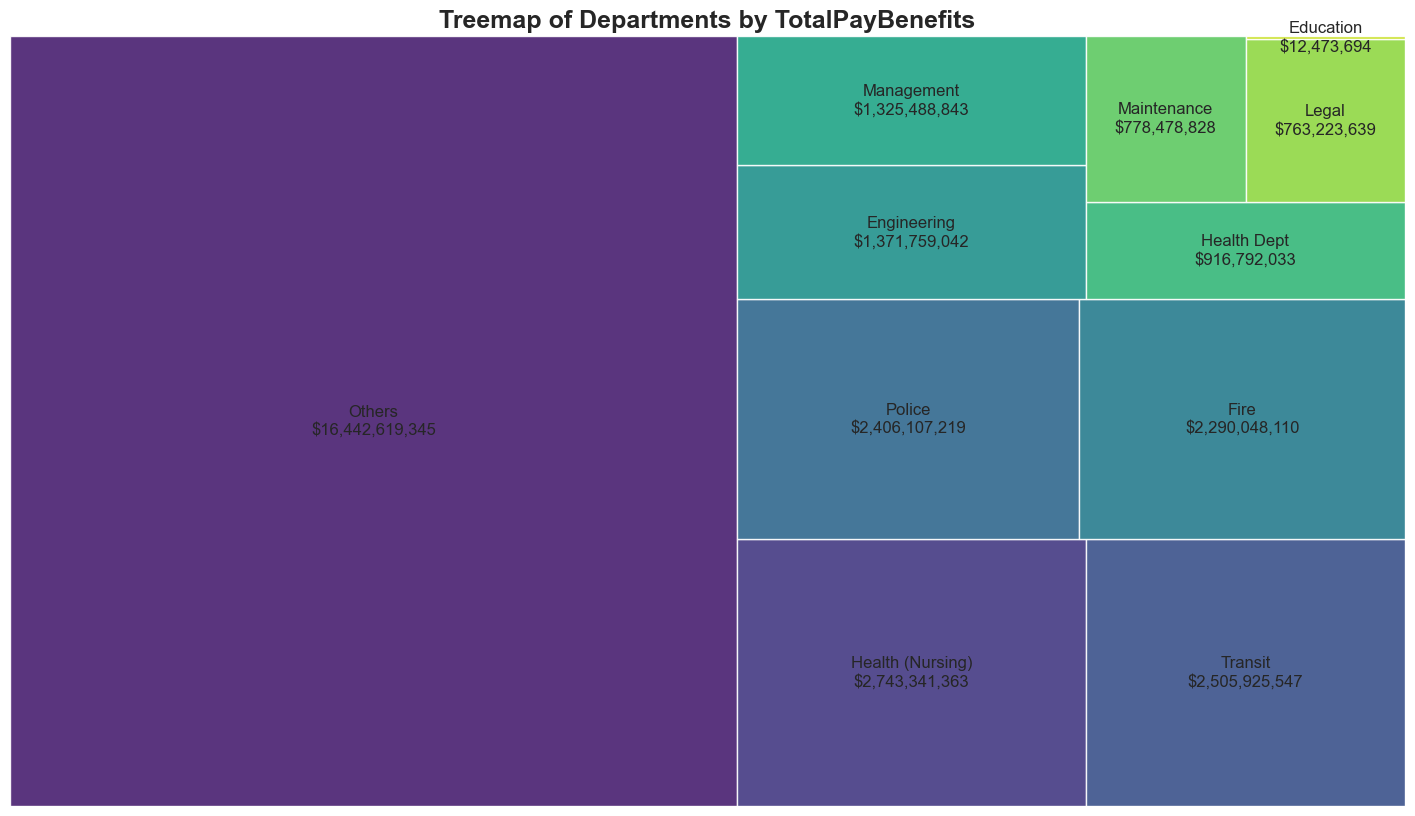

In [26]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

sns.set(style="whitegrid")

# Aggregate TotalPayBenefits by Department
dept_pay_benefits = (
    df.groupby("Department")["TotalPayBenefits"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(18, 10))
squarify.plot(
    sizes=dept_pay_benefits.values,
    label=[f"{x}\n${y:,.0f}" for x, y in zip(dept_pay_benefits.index, dept_pay_benefits.values)],
    color=sns.color_palette("viridis", len(dept_pay_benefits)),
    alpha=0.9
)

plt.title("Treemap of Departments by TotalPayBenefits", fontsize=18, weight="bold")
plt.axis("off")
plt.show()

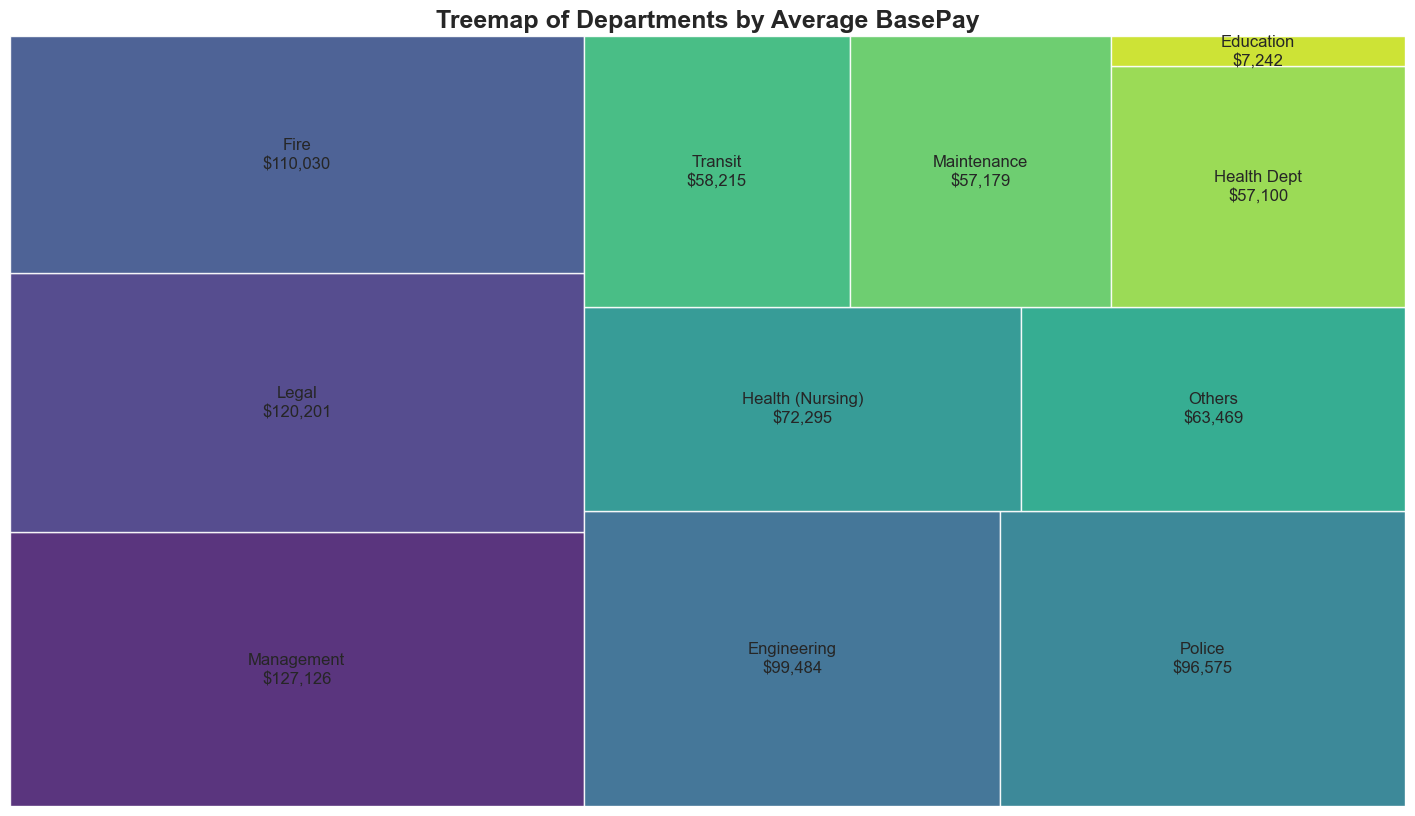

In [27]:
# --- Treemap of Departments by Average BasePay ---

# Aggregate Average BasePay by Department
dept_avg_base = (
    df.groupby("Department")["BasePay"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(18, 10))
squarify.plot(
    sizes=dept_avg_base.values,
    label=[f"{x}\n${y:,.0f}" for x, y in zip(dept_avg_base.index, dept_avg_base.values)],
    color=sns.color_palette("viridis", len(dept_avg_base)),
    alpha=0.9
)

plt.title("Treemap of Departments by Average BasePay", fontsize=18, weight="bold")
plt.axis("off")
plt.show()

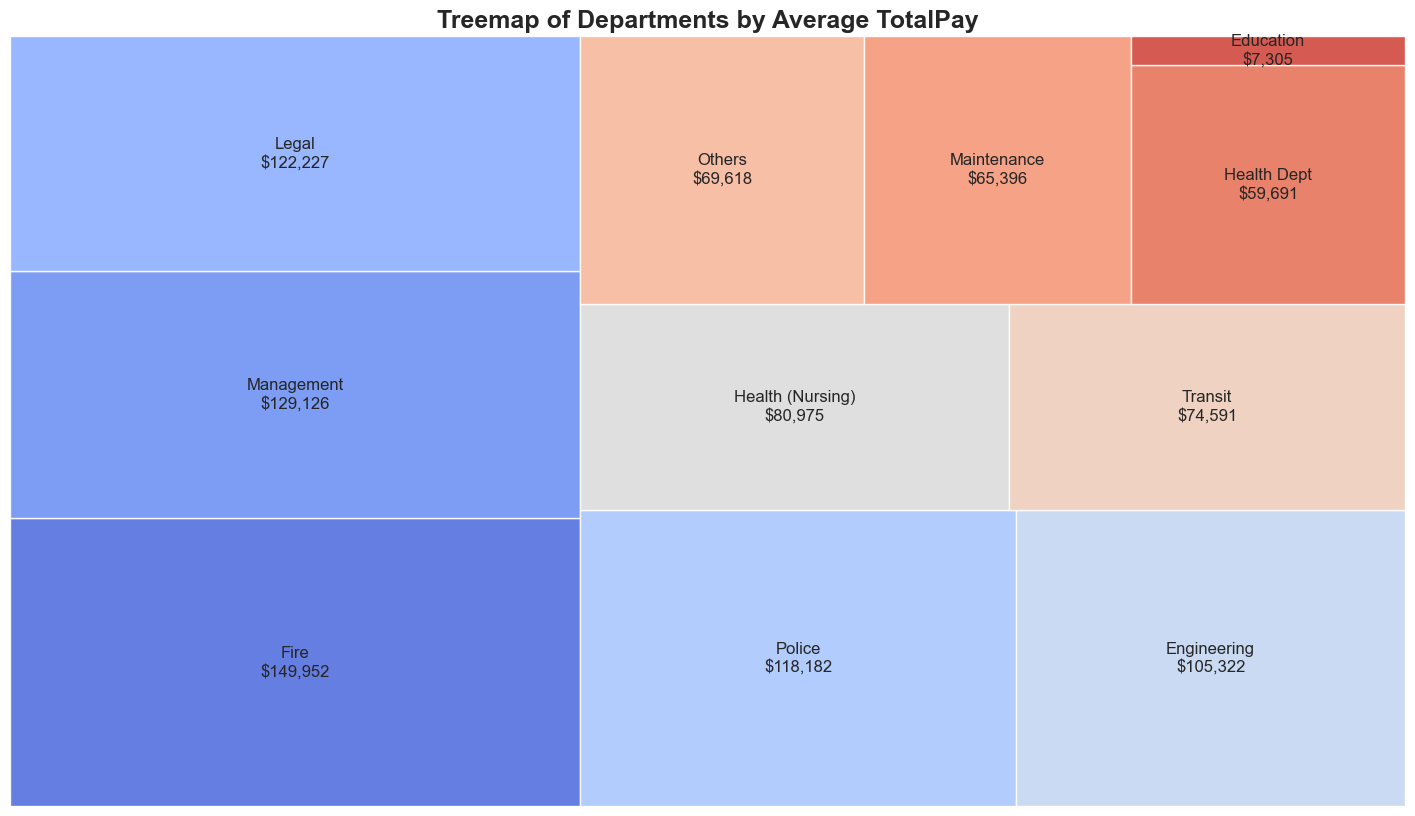

In [28]:
# --- Treemap of Departments by Average TotalPay ---

dept_avg_totalpay = (
    df.groupby("Department")["TotalPay"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(18, 10))
squarify.plot(
    sizes=dept_avg_totalpay.values,
    label=[f"{x}\n${y:,.0f}" for x, y in zip(dept_avg_totalpay.index, dept_avg_totalpay.values)],
    color=sns.color_palette("coolwarm", len(dept_avg_totalpay)),
    alpha=0.9
)

plt.title("Treemap of Departments by Average TotalPay", fontsize=18, weight="bold")
plt.axis("off")
plt.show()

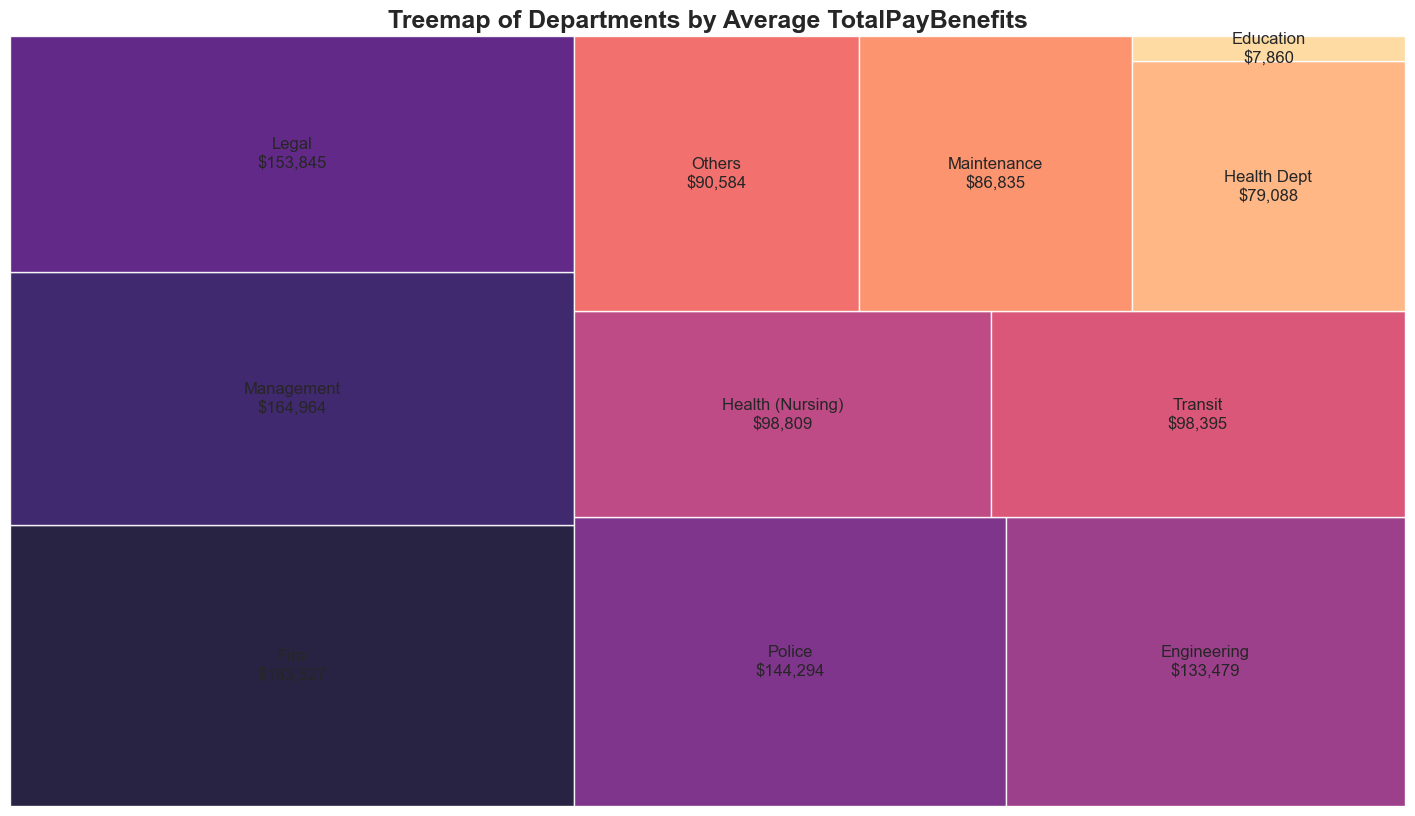

In [29]:
# --- Treemap of Departments by Average TotalPayBenefits ---

dept_avg_totalpaybenefits = (
    df.groupby("Department")["TotalPayBenefits"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(18, 10))
squarify.plot(
    sizes=dept_avg_totalpaybenefits.values,
    label=[f"{x}\n${y:,.0f}" for x, y in zip(dept_avg_totalpaybenefits.index, dept_avg_totalpaybenefits.values)],
    color=sns.color_palette("magma", len(dept_avg_totalpaybenefits)),
    alpha=0.9
)

plt.title("Treemap of Departments by Average TotalPayBenefits", fontsize=18, weight="bold")
plt.axis("off")
plt.show()

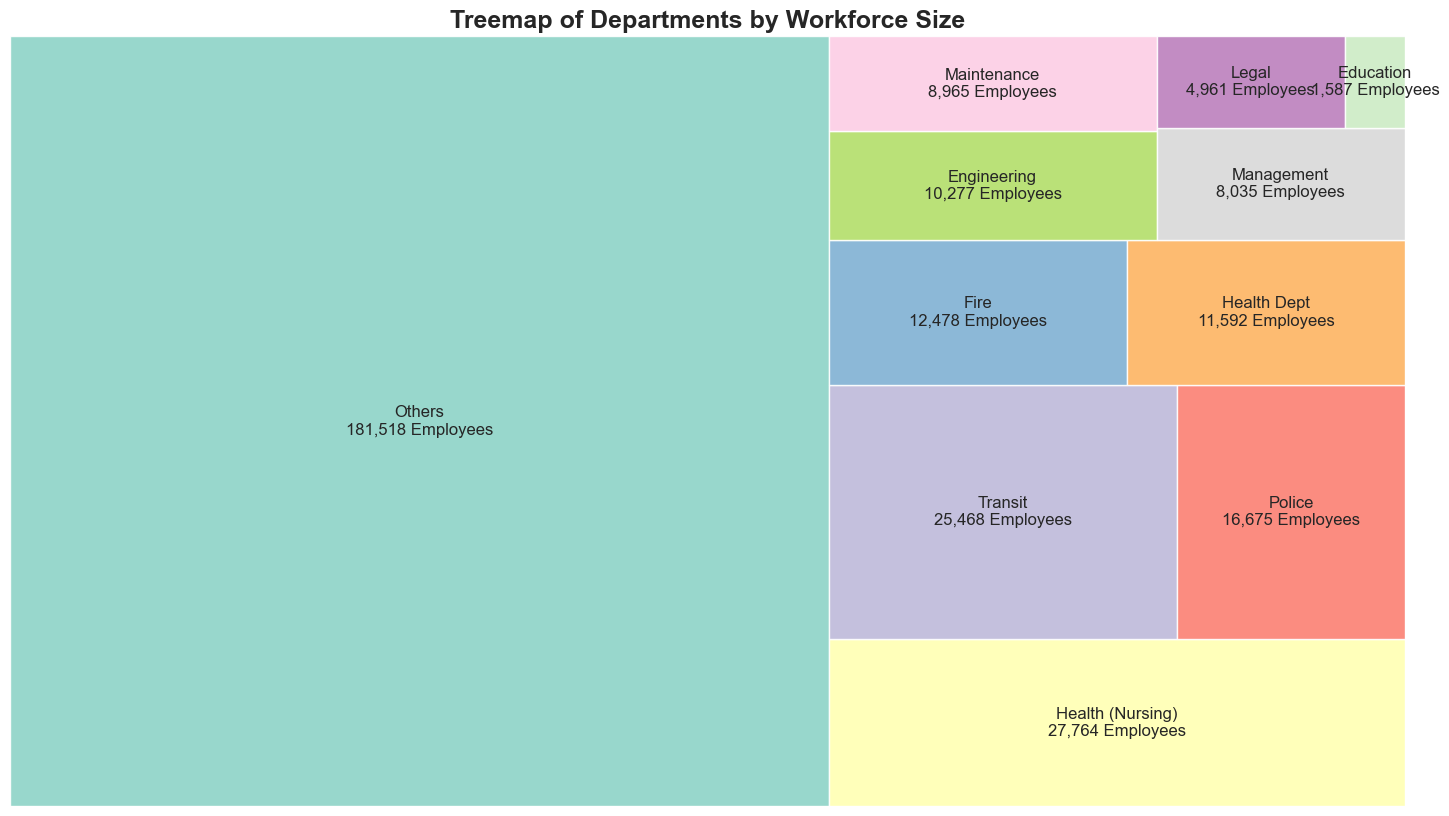

In [30]:
# --- Treemap of Departments by Workforce Size (Employee Count) ---

dept_counts = (
    df["Department"]
    .value_counts()
    .sort_values(ascending=False)
)

plt.figure(figsize=(18, 10))
squarify.plot(
    sizes=dept_counts.values,
    label=[f"{x}\n{y:,} Employees" for x, y in zip(dept_counts.index, dept_counts.values)],
    color=sns.color_palette("Set3", len(dept_counts)),
    alpha=0.9
)

plt.title("Treemap of Departments by Workforce Size", fontsize=18, weight="bold")
plt.axis("off")
plt.show()

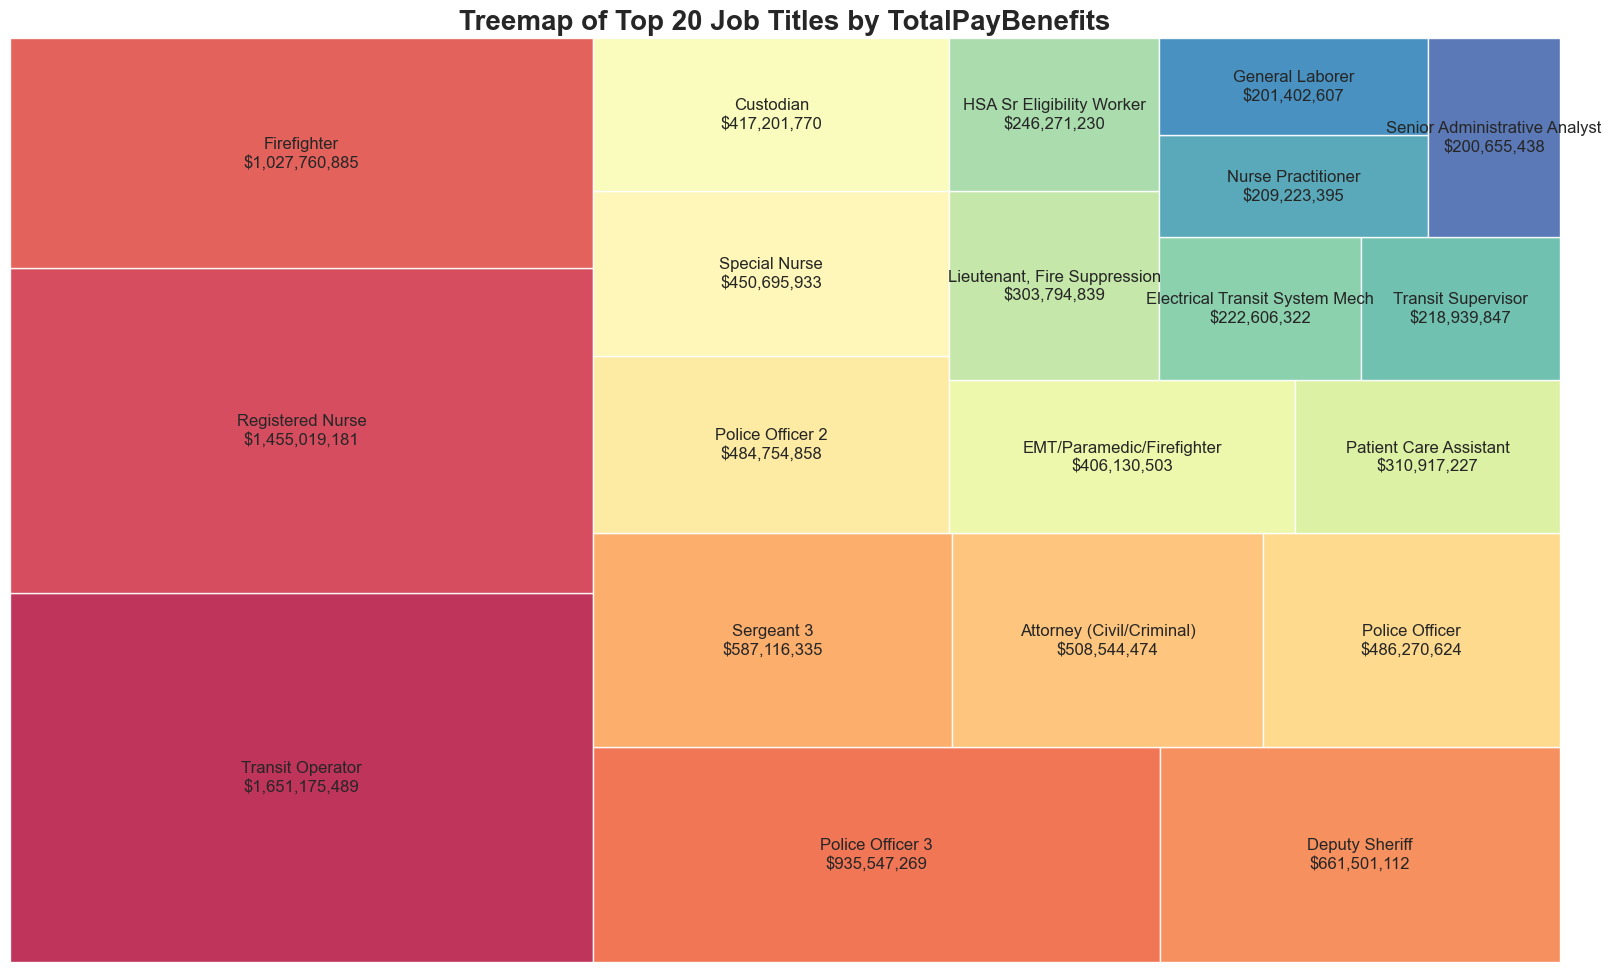

In [31]:
# --- Treemap of Top 20 Job Titles by TotalPayBenefits ---

job_top_benefits = (
    df.groupby("JobTitle")["TotalPayBenefits"]
      .sum()
      .sort_values(ascending=False)
      .head(20)    # top 20 job titles
)

plt.figure(figsize=(20, 12))
squarify.plot(
    sizes=job_top_benefits.values,
    label=[f"{x}\n${y:,.0f}" for x, y in zip(job_top_benefits.index, job_top_benefits.values)],
    color=sns.color_palette("Spectral", len(job_top_benefits)),
    alpha=0.9
)

plt.title("Treemap of Top 20 Job Titles by TotalPayBenefits", fontsize=20, weight="bold")
plt.axis("off")
plt.show()

In [33]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create pay categories
df['PayCategory'] = pd.qcut(
    df['TotalPayBenefits'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

features = [
    'BasePay', 'OvertimePay', 'OtherPay', 'Benefits',
    'Year', 'JobTitle', 'Department'
]

X = df[features]
y = df['PayCategory']

# Modified ColumnTransformer to handle missing values
ct = ColumnTransformer(
    transformers=[
        # Add SimpleImputer for categorical columns before encoding
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), ['JobTitle', 'Department'])
    ],
    # Add SimpleImputer for numerical columns
    remainder=Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
    ])
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = Pipeline(steps=[
    ('preprocess', ct),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
importances = model.named_steps['rf'].feature_importances_

Accuracy: 0.9889919824130351

Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.99      0.99     20622
         Low       0.99      0.99      0.99     20621
      Medium       0.98      0.98      0.98     20621

    accuracy                           0.99     61864
   macro avg       0.99      0.99      0.99     61864
weighted avg       0.99      0.99      0.99     61864


Confusion Matrix:
 [[20414     0   208]
 [    1 20459   161]
 [  180   131 20310]]


In [34]:
# 1. Get feature names from ColumnTransformer
ohe = model.named_steps['preprocess'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(['JobTitle','Department'])

# 2. Numeric feature names
num_features = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'Year']

# 3. Combine numeric + encoded categorical features
all_features = list(num_features) + list(ohe_features)

# 4. Extract feature importances from Random Forest
importances = model.named_steps['rf'].feature_importances_

# 5. Build feature importance table
import pandas as pd
fi_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

fi_df.head(20)

,Feature,Importance
2230,Department_Maintenance,0.374521
2233,Department_Police,0.273405
2231,Department_Management,0.073500
2232,Department_Others,0.065102
2234,Department_Transit,0.025085
2227,Department_Health (Nursing),0.007766
1944,JobTitle_Special Assistant 21,0.006417
2221,"JobTitle_YOUTH COMMISSION ADVISOR, BOARD OF SU...",0.006160
2226,Department_Fire,0.005087
2106,JobTitle_Transit Fare Inspector,0.004665


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3536\3968978667.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


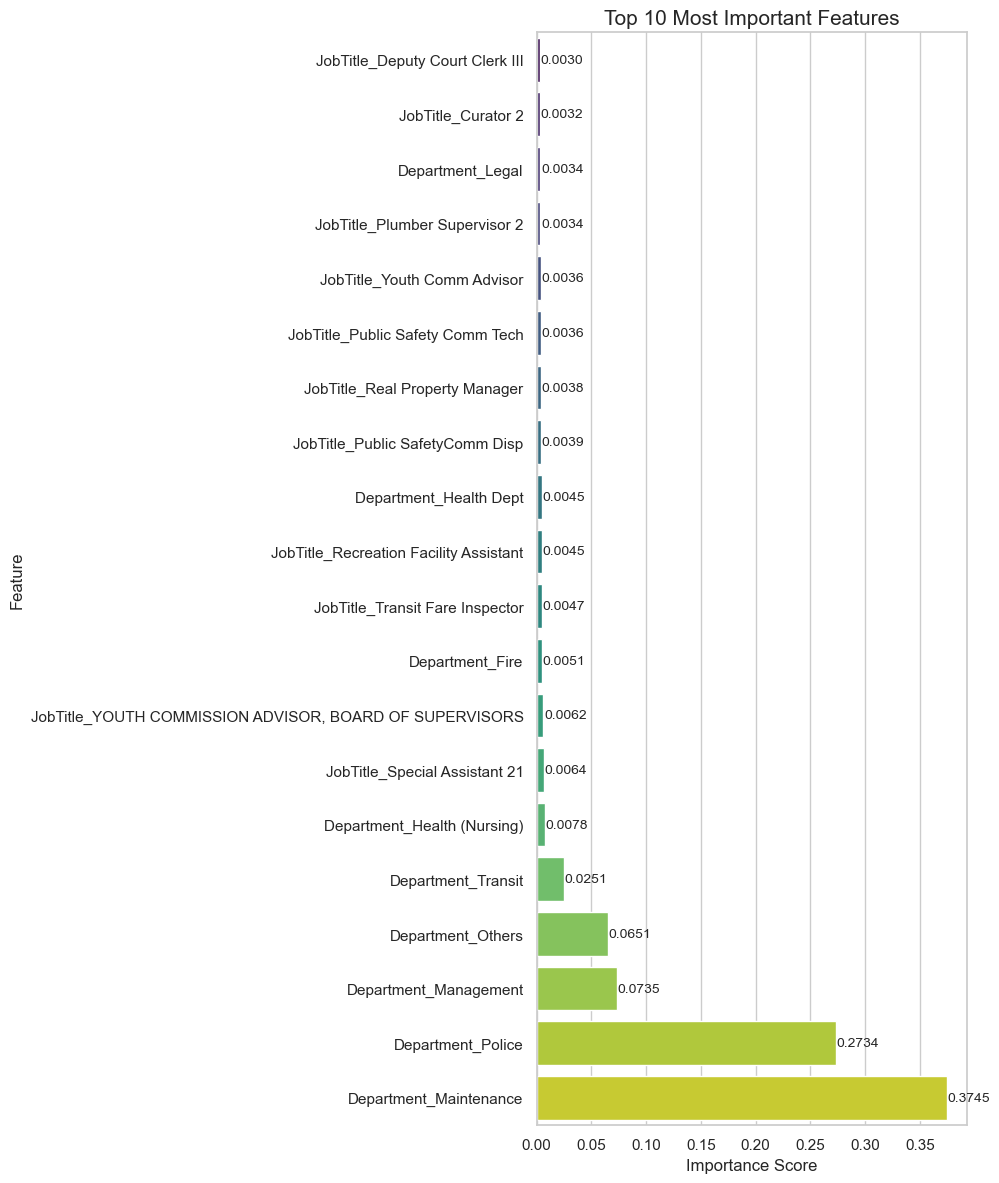

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

top20 = fi_df.head(20)[::-1]

plt.figure(figsize=(10, 12))
sns.barplot(
    x='Importance',
    y='Feature',
    data=top20,
    palette='viridis'
)

plt.title("Top 10 Most Important Features", fontsize=15)
plt.xlabel("Importance Score", fontsize=12)

# Add labels
for i, v in enumerate(top20['Importance']):
    plt.text(
        v + 0.0005,
        i,
        f"{v:.4f}",
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()


In [43]:
# First, install the xgboost package
!pip install xgboost

# Then import the required libraries
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder  # Add this import

# Convert string labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Your original code continues here with the encoded labels
xgb_model = Pipeline(steps=[
    ('preprocess', ct),
    ('xgb', XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softprob',
        eval_metric='mlogloss',
        random_state=42
    ))
])

# Use encoded labels for training
xgb_model.fit(X_train, y_train_encoded)

# Predict using encoded format
y_pred_xgb_encoded = xgb_model.predict(X_test)

# Convert predictions back to original labels for reporting
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9957325746799431

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00     20622
         Low       1.00      1.00      1.00     20621
      Medium       0.99      0.99      0.99     20621

    accuracy                           1.00     61864
   macro avg       1.00      1.00      1.00     61864
weighted avg       1.00      1.00      1.00     61864



In [44]:
from sklearn.linear_model import LogisticRegression

log_model = Pipeline(steps=[
    ('preprocess', ct),
    ('lr', LogisticRegression(
        max_iter=1000,
        multi_class='multinomial',
        n_jobs=-1
    ))
])

log_model.fit(X_train, y_train)

y_pred_lr = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9976561489719384

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00     20622
         Low       1.00      1.00      1.00     20621
      Medium       1.00      1.00      1.00     20621

    accuracy                           1.00     61864
   macro avg       1.00      1.00      1.00     61864
weighted avg       1.00      1.00      1.00     61864



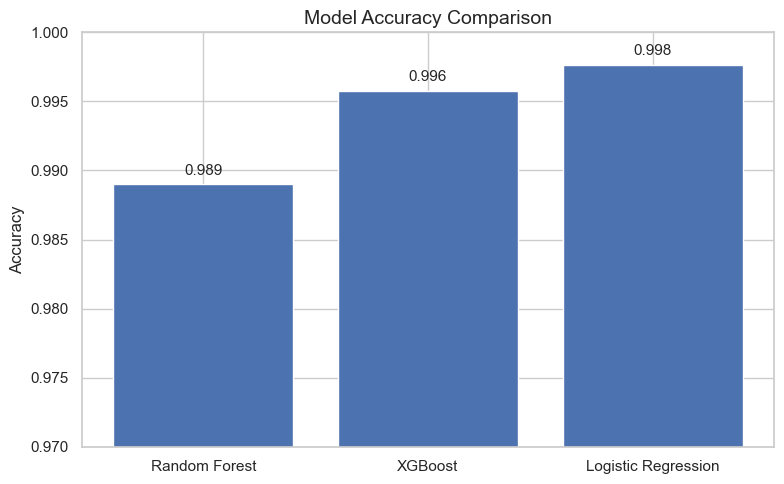

In [47]:
import matplotlib.pyplot as plt

# Put your real values here (I used what you showed in the screenshots)
acc_rf = 0.9889919      # Random Forest
acc_xgb = 0.9957326     # XGBoost
acc_lr = 0.9976561      # Logistic Regression

models = ['Random Forest', 'XGBoost', 'Logistic Regression']
accuracies = [acc_rf, acc_xgb, acc_lr]

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies)

plt.ylim(0.97, 1.0)  # zoom in so differences are visible
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)

# Add accuracy labels on top of bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.0005,
             f"{acc:.3f}",
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


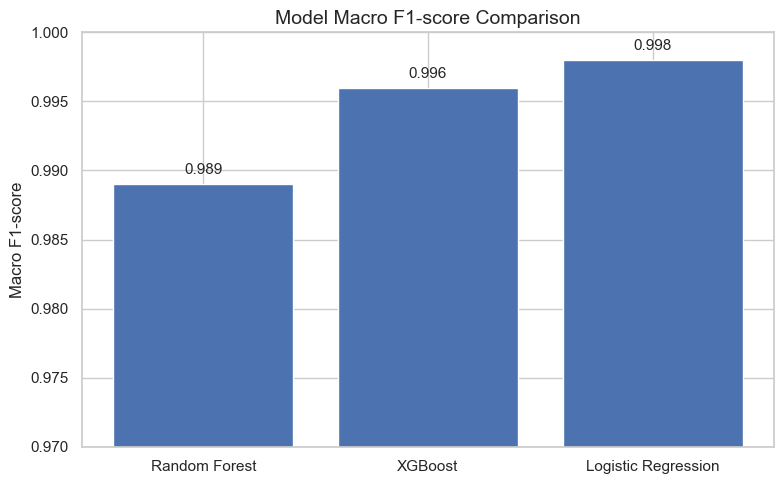

In [48]:
# Example: replace these with the real macro F1 scores you got
f1_rf = 0.989
f1_xgb = 0.996
f1_lr = 0.998

models = ['Random Forest', 'XGBoost', 'Logistic Regression']
f1_scores = [f1_rf, f1_xgb, f1_lr]

plt.figure(figsize=(8,5))
bars = plt.bar(models, f1_scores)

plt.ylim(0.97, 1.0)
plt.title('Model Macro F1-score Comparison', fontsize=14)
plt.ylabel('Macro F1-score', fontsize=12)

for bar, f1 in zip(bars, f1_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.0005,
             f"{f1:.3f}",
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()
